In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('dark_background')

In [2]:
data = pd.read_csv('marks_data.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.shape

(25, 2)

## Checking the relation between Independent and Target Variable

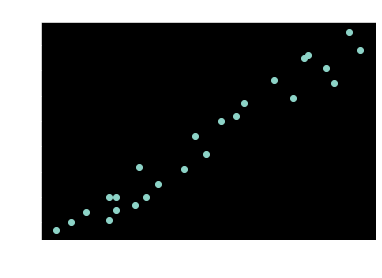

In [10]:
plt.scatter(data['Hours'], data['Scores'])
plt.xlabel("Number of Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores")
plt.show()

**Observation:** We can clearly notice that Number of Hours studied is linearly related to the Scores of the student.

## Splitting the data into for training and testing

In [11]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(data['Hours'].values.reshape(-1,1), data['Scores'], test_size = 0.2, random_state = 42)

In [37]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((20, 1), (20,), (5, 1), (5,))

## Training the Linear Regression Model

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Plotting the predicted Line

In [40]:
coefficient = model.coef_
intercept = model.intercept_

# Since, y = m*x + c
line = (data['Hours'].values * coefficient) + intercept

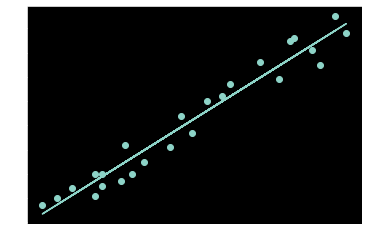

In [41]:
plt.scatter(data.Hours, data.Scores)
plt.plot(data.Hours, line)
plt.show()

In [42]:
pred = model.predict(X_test)
pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

## Comparing Actual and Predicted Values

In [45]:
pred_compare = pd.DataFrame({'Actual Values': y_test, 'Predicted Values':pred})
pred_compare

,Actual Values,Predicted Values
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


## Evaluating the Model

In [46]:
from sklearn import metrics

In [50]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, pred))
print("Root Mean Squared Error: ", metrics.mean_squared_error(y_test, pred)**0.5)
print("R2 Score: ", metrics.r2_score(y_test, pred))

Mean Absolute Error:  3.9207511902099244
Mean Squared Error:  18.943211722315272
Root Mean Squared Error:  4.352380006653288
R2 Score:  0.9678055545167994
